<a href="https://colab.research.google.com/github/GuilhermeFerracini/Machine_Learning/blob/main/Deep_Learning/keras_tensor_img_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libs
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
# Loading Data
data_set = keras.datasets.fashion_mnist
((x_train, y_train), (x_test, y_test)) = data_set.load_data()

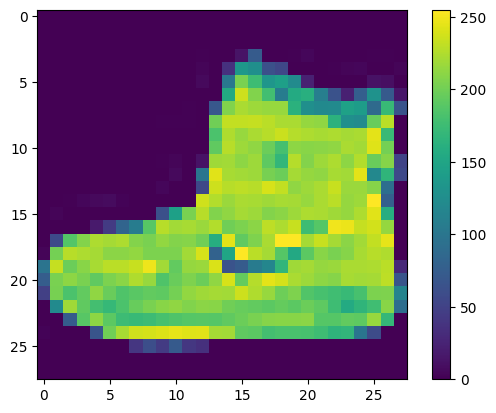

In [ ]:
# Visualization
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(x_train[0])
plt.colorbar()

In [ ]:
# Normalization
x_train = x_train/float(255)

In [ ]:
# Criação do modelo
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dropout(0.2),  # Normalization
                          keras.layers.Dense(10, activation=tf.nn.softmax)
                          ])

In [ ]:
model_summary = model.summary()

In [ ]:
model.get_config()

In [ ]:
# Testes de pesos e vieses

weight_layer_dense = model.layers[1].get_weights()[0]
bias_layer_dense = model.layers[1].get_weights()[1]

weight_zero_layer_dense = np.zeros((784, 256))
weight_random_layer_dense = np.random.rand(784, 256)
bias_zero_layer_dense = np.zeros((256,))

model.layers[1].set_weights([weight_layer_dense, bias_layer_dense])

# (entrada * peso) + vies
# GlorotUniform inicializa os pesos com valores nem tao grandes e nem tao baixos -> http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
# Gradiente Descendente busca a menor perda mas o (momentum): momentum alto -> pode passar muito do ponto  &  momentum baixo -> pode demorar para alcancar a menor perda
# Na busca de menor perda o algoritmo pode parar em um minimo local o que é ruim pois o objetivo é alcançar o minimo global ou seja a menor perda
# Introduzir aleatoriedade é um alternativa e isso é um:  Gradiente Descendente estocastico
# Adam é um outro otimizador que possui uma estimativa de momento adaptavel

In [ ]:
# Fitting - Treinamento do modelo

# Hyperparametro learning rate do adam optmizer
adam = keras.optimizers.Adam(lr=0.003)


# Verifica estacionamento da val_loss e salva MELHOR MODELO
callback = [keras.callbacks.EarlyStopping(monitor='val_loss'), keras.callbacks.ModelCheckpoint(
    filepath='melhor_modelo.hdf5', monitor='val_loss', save_best_only=True)]


#Compile
model.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fit
historical = model.fit(x_train, y_train, batch_size=480,#Hyperparametro
                       epochs=5, validation_split=0.3, callbacks=callback)

Epoch 1/5
88/88 [==============================] - 8s 74ms/step - loss: 0.7603 - accuracy: 0.7411 - val_loss: 0.4987 - val_accuracy: 0.8335
Epoch 2/5
 1/88 [..............................] - ETA: 4s - loss: 0.5109 - accuracy: 0.8083

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 4s 49ms/step - loss: 0.4801 - accuracy: 0.8353 - val_loss: 0.4415 - val_accuracy: 0.8469
Epoch 3/5
88/88 [==============================] - 5s 56ms/step - loss: 0.4305 - accuracy: 0.8503 - val_loss: 0.4038 - val_accuracy: 0.8600
Epoch 4/5
88/88 [==============================] - 5s 53ms/step - loss: 0.3970 - accuracy: 0.8611 - val_loss: 0.3852 - val_accuracy: 0.8642
Epoch 5/5
88/88 [==============================] - 4s 43ms/step - loss: 0.3765 - accuracy: 0.8670 - val_loss: 0.3775 - val_accuracy: 0.8669


In [ ]:
model.save('modelo_epochs5_nos3.h5')
modelo_salvo = load_model('modelo_epochs5_nos3.h5')

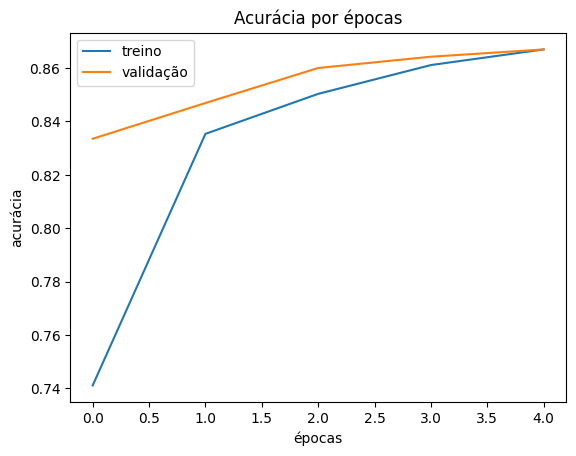

In [ ]:
plt.plot(historical.history['accuracy'])
plt.plot(historical.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

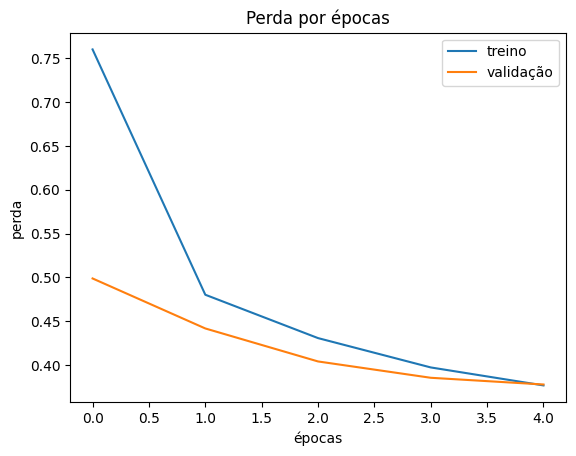

In [ ]:
plt.plot(historical.history['loss'])
plt.plot(historical.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [ ]:
testes_modelo_salvo = modelo_salvo.predict(x_test)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[43]))
print('número da imagem de teste:', y_test[43])

313/313 [==============================] - 4s 11ms/step
resultado teste modelo salvo: 7
número da imagem de teste: 7


In [ ]:
perda_teste, acuracia_teste = model.evaluate(x_test, y_test)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 3s 7ms/step - loss: 48.5436 - accuracy: 0.8590
Perda do teste: 48.543636322021484
Acurácia do teste: 0.859000027179718
